# МАДМО

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  
Домашнее задание необходимо загрузить в общий репозиторий с именной папкой 


## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [1]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [9]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((1000,1000))
b = np.random.sample((1000,1000))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
# тут можно писать код 
print("a.ndim - {}".format(a.ndim))
print("a.shape - {}".format(a.shape))
print("ранг a - {}".format(np.linalg.matrix_rank(a)))

print("b.ndim - {}".format(b.ndim))
print("b.shape - {}".format(b.shape))
print("ранг b - {}".format(np.linalg.matrix_rank(b)))



# ========
print(a)
print(b)

a.ndim - 2
a.shape - (1000, 1000)
ранг a - 1000
b.ndim - 2
b.shape - (1000, 1000)
ранг b - 1000
[[0.18376095 0.25938673 0.17202583 ... 0.74421722 0.98043513 0.39163176]
 [0.76764314 0.42347308 0.8117437  ... 0.79858662 0.3025914  0.13847388]
 [0.85024039 0.17286231 0.6480569  ... 0.19266295 0.81000942 0.48172494]
 ...
 [0.11641355 0.10282982 0.15297164 ... 0.10271089 0.98903125 0.77740199]
 [0.36331808 0.69589154 0.59474407 ... 0.90606687 0.40639368 0.31858731]
 [0.33324965 0.96515703 0.36804569 ... 0.74239518 0.48407767 0.16307316]]
[[0.14867397 0.49329703 0.94865763 ... 0.32727674 0.97500068 0.33610724]
 [0.43571242 0.88671361 0.00462617 ... 0.0394985  0.44839191 0.33811326]
 [0.06709014 0.92439076 0.89847856 ... 0.16145775 0.7097121  0.86568948]
 ...
 [0.46971659 0.83750215 0.26379405 ... 0.11058305 0.93350338 0.41788146]
 [0.19464244 0.75242462 0.18298665 ... 0.85350656 0.16182845 0.73294451]
 [0.35211456 0.4678326  0.34337132 ... 0.3807131  0.45577958 0.17478365]]


In [4]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат 
    if a.shape[1]==b.shape[0]:
        m=a.shape[1]
        r=a.shape[0]
        c=b.shape[1]

        res=np.zeros((r,c))
        for i in range(r):
            for j in range(c):
                for r in range(m):
                    res[i,j]+=a[i,r]*b[r,j]
        print(res)
    else:
        print("error")
    

In [5]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    print(a @ b)

In [6]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

KeyboardInterrupt: 

In [7]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

[[248.39864326 254.75810245 238.3594142  ... 248.33934315 250.27878142
  244.07166614]
 [249.7395416  256.60852034 246.98063695 ... 251.08365068 256.56682103
  252.59956924]
 [248.74491727 258.06130182 239.25661863 ... 249.45550826 251.51971929
  241.60256377]
 ...
 [252.32234902 256.33239441 238.76994321 ... 252.61632628 248.82140913
  248.77812908]
 [248.30271933 258.67321864 241.99512431 ... 244.73953388 248.081074
  243.46775751]
 [254.87204503 260.27377512 240.38362573 ... 251.85129813 248.77354095
  248.44272778]]
CPU times: user 95.3 ms, sys: 5.92 ms, total: 101 ms
Wall time: 30 ms


### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [41]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    # Ваш код здесь
    return np.cumsum(A)/np.arange(1,len(A)+1)

In [51]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(len(A)):
        # Ваш код здесь
        cs=0
        for k in range(i+1):
            # Ваш код здесь
            cs+=A[k]
        S[i]=cs/(i+1)
    return S

In [47]:
from tqdm import tqdm
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in tqdm(range(len(A))):
        # Ваш код здесь
        cs=0
        for k in tqdm(range(i+1)):
            # Ваш код здесь
            cs+=A[k]
        S[i]=cs/(i+1)
    return S

In [55]:
# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 4) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 396 µs, sys: 318 µs, total: 714 µs
Wall time: 461 µs
CPU times: user 7.34 s, sys: 4.18 ms, total: 7.34 s
Wall time: 7.34 s


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [ ]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    # Ваш код здесь
    return Y

In [ ]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X):
    # Ваш код здесь
    return Y

In [ ]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Почему методы ***numpy*** оказываются эффективнее?

In [ ]:
# Ваш ответ
# Потому что написаны на  С++

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [72]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

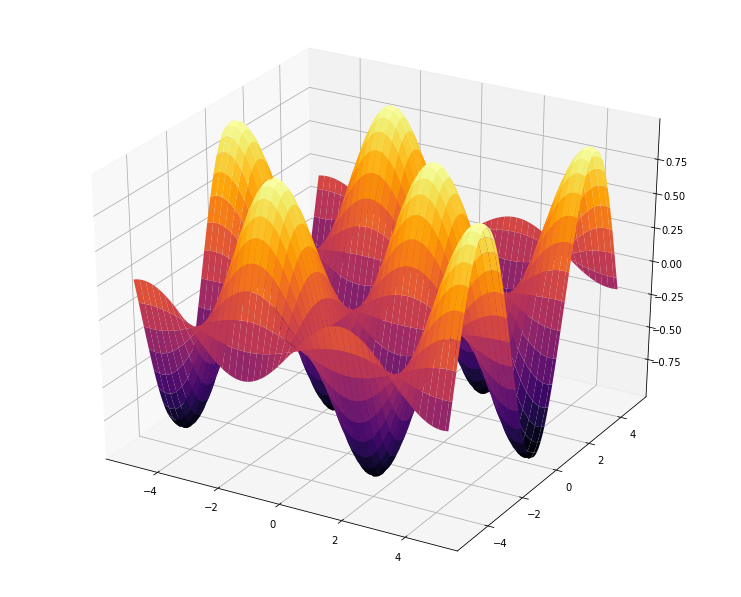

In [88]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
grid_x, grid_y = np.meshgrid(x, y)# Ваш код здесь
draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [84]:
from matplotlib import pyplot as plt
%matplotlib inline

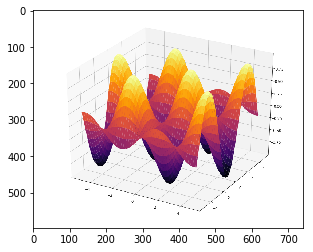

In [89]:
path_to_image = 'image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [ ]:
flat_image_array = # Ваш код здесь

In [ ]:
# здесь выведите размер нового массива

In [101]:
print(image_array[400,400])

[0.48235294 0.13725491 0.44313726 1.        ]


In [104]:
image_array[:2,:2]

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.]]], dtype=float32)

In [105]:
image_array.shape

(597, 741, 4)

In [110]:
i=np.reshape(image_array, 597*741*4)

In [114]:
i.

1

In [113]:
i[:16]

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
      dtype=float32)

TypeError: Invalid dimensions for image data

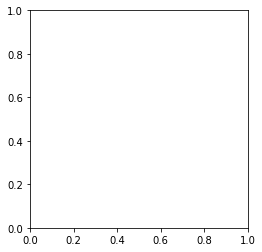